Visualization to describe the evolution of the 2019-nCov, 
data from https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6 and the links there on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname_infected = 'https://docs.google.com/spreadsheets/d/1UF2pSkFTURko2OvfHWWlFpDFAr1UxCBA4JLwlSP6KFo/export?format=csv&gid=0'
fname_dead = 'https://docs.google.com/spreadsheets/d/1UF2pSkFTURko2OvfHWWlFpDFAr1UxCBA4JLwlSP6KFo/export?format=csv&id=1UF2pSkFTURko2OvfHWWlFpDFAr1UxCBA4JLwlSP6KFo&gid=1056055583'
df_infected = pd.read_csv(fname_infected)
df_dead = pd.read_csv(fname_dead)
df_infected.fillna(value=0, inplace=True)
df_dead.fillna(value=0, inplace=True)

In [3]:
dates_infected = pd.to_datetime(df_infected.columns[5:])
dates_dead = pd.to_datetime(df_dead.columns[5:])

In [4]:
data_infected = df_infected.values[:, 5:]
infected = np.sum(data_infected, axis=0)

data_dead = df_dead.values[:,5:]
dead = np.sum(data_dead, axis=0)

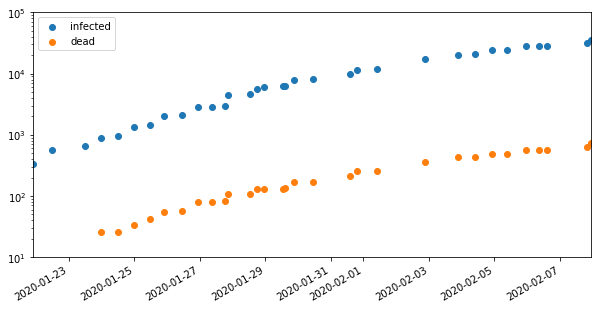

In [10]:
fig = plt.figure(figsize=[10,5])
plt.scatter(dates_infected, infected, label='infected')
plt.scatter(dates_dead, dead, label = 'dead')
plt.yscale('log')
plt.legend()
plt.xlim([dates_infected[0], dates_infected[-1]])
plt.ylim([10, 1e5])
fig.autofmt_xdate()

In [30]:
ratios = []
for j in range(1,30):
    ratios.append(dead[-j]/infected[-j])

(array([9., 7., 2., 2., 1., 1., 1., 1., 3., 2.]),
 array([0.01992734, 0.02086348, 0.02179962, 0.02273575, 0.02367189,
        0.02460802, 0.02554416, 0.0264803 , 0.02741643, 0.02835257,
        0.0292887 ]),
 <a list of 10 Patch objects>)

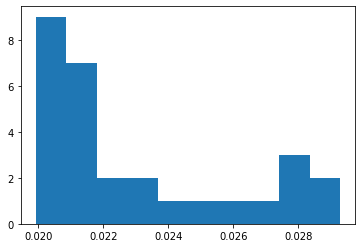

In [31]:
plt.hist(ratios)